In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<h3 style="color:Tomato;">I. Model1 - simple data set (using gradient descent)</h3>
<h4 style="color:Tomato;">Step 1: Model Training</h4>
<p>le programme suivant permet de calculer l'erreur pour plusieurs couple (bias,w1). chaque couple (bias,w1) représente un modèle</p>
<p>pour simplifier, nous allons fixer bias</p> 

In [65]:
#dataset
X=np.array([1,2,3,4,7]) #features x1={1,2...7}
y=np.array([4,7,10,13,22]) #target, output


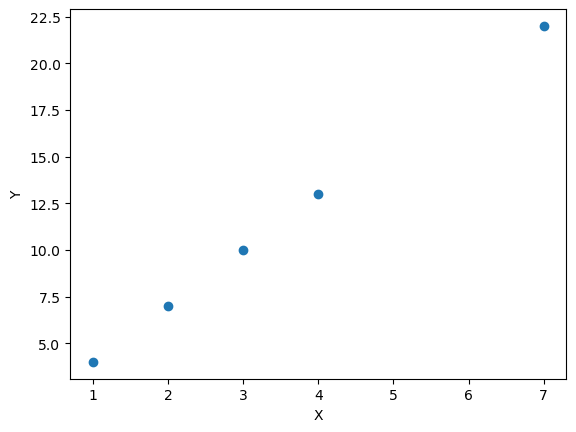

In [66]:
#plot data
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<p>Un modèle de régression permet de faire la liaison entre la sortie et l'entrée de la manière suivante:</p>
<p>y=H(X). avec y est l'output et X est linput. En général X est une matrice (tableau à deux dimension avec plusieurs colonnes (variables) x1,x2...xn).</p>
<p>le modèle H à trouver a la forme suivante: H(X)=bias+w1.x1+w2.x2+...+wn.xn</p>
<p>dans un premier temps, pour simplifier, nous allons considérer un X avec une seule variable. dans ce cas, notre modèle a la forme suivante:</p>
<p>H(x1)=bias+w1.x1</p>
<p>qu'est ce que c'est l'apprentissage?</p>
<p>L'apprentissage est la capacité d'un algorithme de trouver les bons paramètres du modèle qui sont: bias et wi pour i allant de 1 à n, avec n le nombre de variables à l'input.</p>
<p>pour le cas d'une seule dimension, l'algorithme est censé de trouver le bias et le bon w1</p>

In [67]:
def train1(X,y):
    n=len(y)
    w1=0# init w1, et dans la suite on cherche le w1 qui minimise l'erreur,
    #dans ce cas, on sait qu'on doit trouver w1=3
    bias=1#supposer que le bias est connu
    #training: mettre à jour w1 et bias de manière à minimiser mse
    #w1:0, 0.1, 0.2, 0.3, 0.4, 0.5
    epochs=60
    global mseList
    mseList=[]
    global w1List
    w1List=[]
    for i in range(epochs):
        #predict
        yhat=bias+w1*X #array
       #error: sur quelle base (y,yhat)
        er=y-yhat
        #squared error
        serr=er**2
        #mse
        mse=(1/n)*np.sum(serr)
        #print result
        print("iteration ",i,": model(",bias,",",w1,"), yhat:",yhat,", mse",round(mse,3))#w1
        mseList.append(mse)
        w1List.append(w1)
        #update bias and w1
        dw1=0.1
        w1=w1+dw1
        
    return bias,w1
    
bias,w1=train1(X,y)
    

iteration  0 : model( 1 , 0 ), yhat: [1 1 1 1 1] , mse 142.2
iteration  1 : model( 1 , 0.1 ), yhat: [1.1 1.2 1.3 1.4 1.7] , mse 132.878
iteration  2 : model( 1 , 0.2 ), yhat: [1.2 1.4 1.6 1.8 2.4] , mse 123.872
iteration  3 : model( 1 , 0.30000000000000004 ), yhat: [1.3 1.6 1.9 2.2 3.1] , mse 115.182
iteration  4 : model( 1 , 0.4 ), yhat: [1.4 1.8 2.2 2.6 3.8] , mse 106.808
iteration  5 : model( 1 , 0.5 ), yhat: [1.5 2.  2.5 3.  4.5] , mse 98.75
iteration  6 : model( 1 , 0.6 ), yhat: [1.6 2.2 2.8 3.4 5.2] , mse 91.008
iteration  7 : model( 1 , 0.7 ), yhat: [1.7 2.4 3.1 3.8 5.9] , mse 83.582
iteration  8 : model( 1 , 0.7999999999999999 ), yhat: [1.8 2.6 3.4 4.2 6.6] , mse 76.472
iteration  9 : model( 1 , 0.8999999999999999 ), yhat: [1.9 2.8 3.7 4.6 7.3] , mse 69.678
iteration  10 : model( 1 , 0.9999999999999999 ), yhat: [2. 3. 4. 5. 8.] , mse 63.2
iteration  11 : model( 1 , 1.0999999999999999 ), yhat: [2.1 3.2 4.3 5.4 8.7] , mse 57.038
iteration  12 : model( 1 , 1.2 ), yhat: [2.2 3.4 4.

<h3 style="color:Tomato;">Analyse du code et interprétation du résultat</h3>
<h3 style="color:DodgerBlue;">Graphe 1: Evolutionde mse en fonction de w1 et en fonction des itérations</h3>



In [68]:
#cette fonction est utilisé dans tout le tutorial
def tracer_graphes(w1List,mseList,iterations):
    plt.figure(figsize=(10,3))
    
    plt.subplot(121) # 1, 2,1
    plt.plot(w1List,mseList)
    plt.xlabel("w1")
    plt.ylabel("mse")
    plt.title("mse en fonction de w1")
   


    plt.subplot(122)
    plt.plot(iterations,mseList)

    plt.xlabel("iteration")
    plt.ylabel("mse")
    plt.title("mse en fonction des iterations")


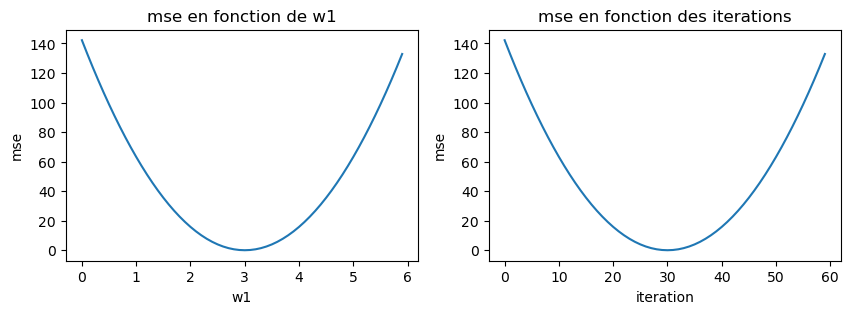

In [69]:
tracer_graphes(w1List,mseList,[i for i in range(60)])

<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [70]:
def predict(x1):
    return bias+w1*x1
yhat=predict(X)
print(yhat)

[ 7. 13. 19. 25. 43.]


<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>
vu que le dataset est tres petit, nous allons utiliser le dataset de training (X) pour évaluer le modèle (bad practice)
<br>dans l'exemple suivant, nous allons utiliser un dataset de test pour évaluer le modèle

In [71]:
def mse(y,yhat):
    return 1/(len(y))*np.sum((y-yhat)**2)
print("mean squared error du modèle est:",round(mse(y,yhat),3))

mean squared error du modèle est: 142.2


In [72]:
class NN_One_Neurone:
    #__init__------------hyper_parameters_initialization
    #epochs, learning rate
    def __init__(self):
        pass
    #fit------------training the model on X,y
    def fit(self,X,y):
        pass
    #predict------------return a prediction of each x in X
    def predict(self,X):
        pass
    #activation------------calculate the output of the neurone
    #here, give the correct name to the function: sigmoid, identity, relu...
    def activation_function(self):
        pass
    

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 0 à l'iération 30?</span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 30 à l'iération 59?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">à quelle itération, mse est minimal?</span>
</p>


<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si on initialise w1 à 6?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si dw1=2? (ou autre valeur plus grande que 2)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 6) </b></span>
    <span  style="color:DodgerBlue;">comment la dérivée partielle (dmse/dw1) permet de régler le problème en 4)? (Algorithme du gradient)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 7) </b></span>
    <span  style="color:DodgerBlue;">comment le learning rate permet de régler le problème en 5)?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 8) </b></span>
    <span  style="color:DodgerBlue;">justifier la valeur de mse  trouvé?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 9) </b></span>
    <span  style="color:DodgerBlue;">Modifier l'algorithme de manière à assurer de trouver les bons paramètres</span>
</p>
<p>
    <span style="color:Tomato;"><b> 10) </b></span>
    <span  style="color:DodgerBlue;">Compléter le code source de la classe NN_One_Neurone</span>
</p>
<p>
    <span style="color:Tomato;"><b> 11) </b></span>
    <span  style="color:DodgerBlue;">Tester les fonctions de la classes</span>
</p>





<h3 style="color:Tomato;">I.2. Model2 (cloud of points)</h3>
<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [83]:
X=np.linspace(0,10,100) # générer 100 valeurs entre 0 et 10
y=2+3*X     # y à générer sur une droite bias=2, w1=3 (ideal model +/-)
 # valeurs aléatoires à ajouter à y
r=np.random.uniform(-7, 7, size=len(y))
y=y+r # update de y autour de la droite


In [84]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
def plot_data(X,y):
    import matplotlib.pyplot as plt
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.show()


In [85]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
#---3. le modèle résultat de l'apprentissage (bias,w1)

def plot_data_model(X,y,bias,w1):
    import matplotlib.pyplot as plt
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.plot(X,bias+w1*X,color="b") #trained model (initial model: bias=1, w1=0)
    plt.show()


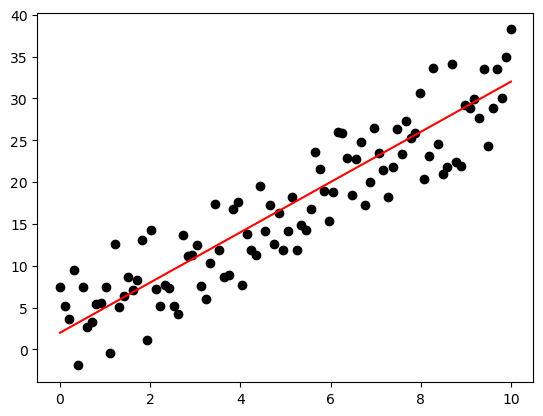

In [86]:
plot_data(X,y)

<h4 style="color:Tomato;">Step 3: Split Data</h4>
<h4 style="color:DodgerBlue;">Pourquoi?</h4>
<p style="color:DodgerBlue;">En machine learning, toujours il faut diviser le dataset d'origine en training dataset et en testdataset afin d'évaluer la performance du modèle sur un dataset non utilisé dans la phase d'entrainement.<br></p>

In [87]:
#data(X,y)-->data_train(X_train,y_train),data_test(X_test,y_test)
from sklearn.model_selection import train_test_split #split data ino training data and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) #
#valeur utiliser pendant la genearation des datasets de manièere aleoire

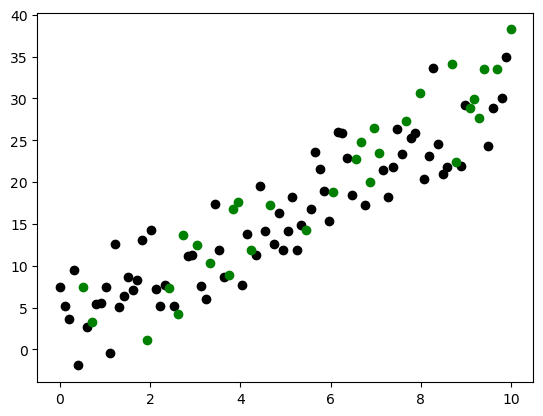

In [88]:
plt.scatter(X_train,y_train,color="black")
plt.scatter(X_test,y_test,color="green")



iteration  0 : (bias= 1 ,w1: 0.5 ) --->mse= 193.14  | update: dbias= -23.86 , dw1= -146.89


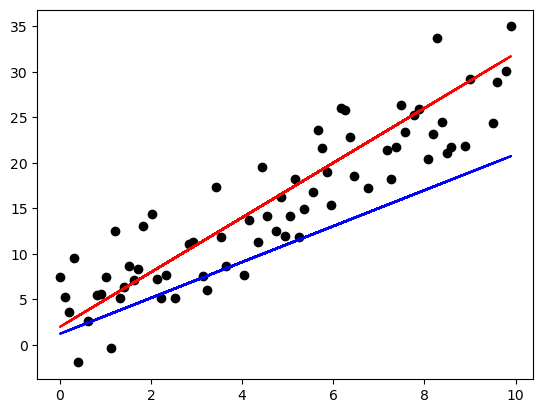

iteration  1 : (bias= 1.24 ,w1: 1.97 ) --->mse= 40.05  | update: dbias= -9.67 , dw1= -56.09


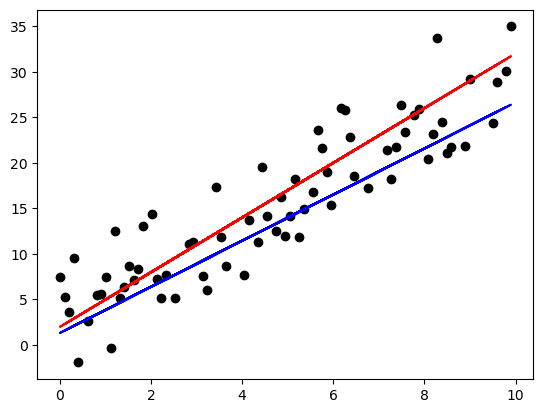

iteration  2 : (bias= 1.34 ,w1: 2.53 ) --->mse= 17.66  | update: dbias= -4.24 , dw1= -21.36


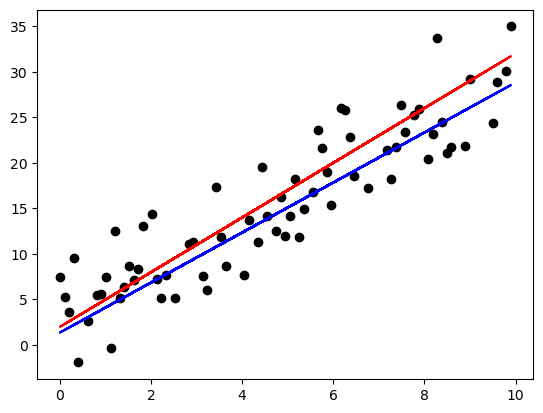

iteration  3 : (bias= 1.38 ,w1: 2.74 ) --->mse= 14.38  | update: dbias= -2.16 , dw1= -8.09


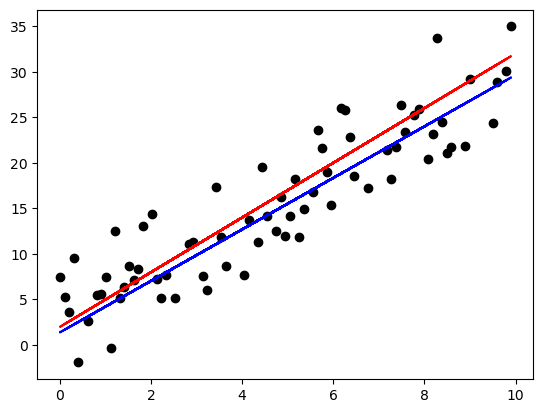

iteration  4 : (bias= 1.4 ,w1: 2.82 ) --->mse= 13.9  | update: dbias= -1.36 , dw1= -3.01


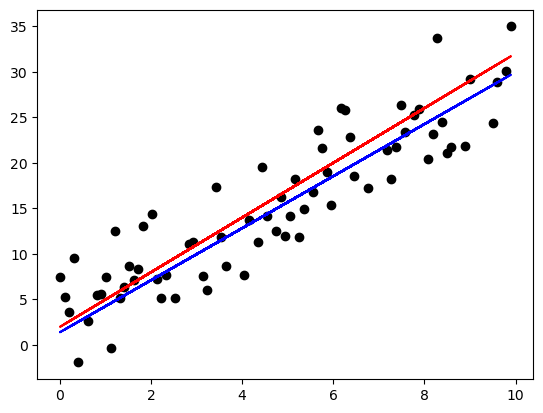

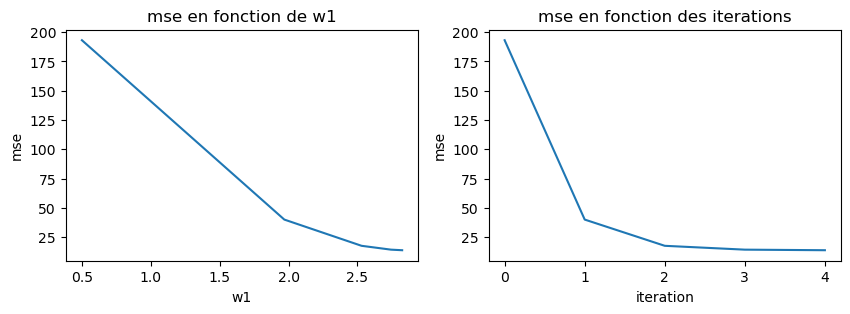

In [89]:
def train2(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=5
    #model parameters initialisation
    w1=0.5 #
    bias=1
    #----------------------
    n=len(X) #data size
    global mseList
    global w1List
    mseList=[]
    w1List=[]
       
 
    #training
    for i in range(epochs):
        yhat=bias+w1*X #prediction
        
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
       
    
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))

        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
        plot_data_model(X,y,bias,w1)
        
    return bias,w1
        
#exécution
bias,w1=train2(X_train,y_train)
tracer_graphes(w1List,mseList,[i for i in range(5)])

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 5 premières itérations? comment justifier ce résultat? il s'agit de quel problème? </span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">quelles sont les recommandations à faire pour corriger ce problème</span>
</p>

<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">donner à learning_rate la valeur 0.01 au lieu de 0.1 et refaire l'exécution. qu'est ce que vous constatez? comment expliquer le résultat obtenu? </span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">Augmenter le nombre d'epochs à 500, puis tracer les graphes à chaque 50 itération. expliquer les résultats obtenus </span>
</p>







<h3 style="color:Tomato;">I.3. Linear Regression Model: Many Feature feature (Advertissing problem)</h3>


<p>Objectif est de prévoir les ventes (sales) à realiser suite à un investissement en publicité <br>
la publicité peut se faire en TV, RADIO, NewsPaper
 question: quelle est la meilleur combinaison à utiliser pour faire un bon Sales.
    exemple: si on souhaite investir 10000 Euro (TV=?, Radio? NewsPaper? afinde maximiser Sales)   
</p>
<p>trouver le modele: Sales(TV,Radio, Neawspaper)=bias+w1*TV+w2*radio+w3*newsPaper</p>

<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [90]:
import pandas as pnd #dataframe
data_frame=pnd.read_csv("advertising.csv")
data_frame.head()
#les trois premières colonnes: features
#la dernière colonne target

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [91]:
#convertir le dataframe en array
data=np.array(data_frame)
#extraire la partie features
X=np.array([data[i,:3] for i in range(len(data))])
#extraire la partie target
y=np.array([data[i,3] for i in range(len(data))])

In [92]:
def train3(x1,x2,x3,y):
    #x1 for tv, x2 for radio, x3 for newspaper
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=10000
    #model parameters initialisation
 #       

    

<h3 style="color:Tomato;">questions</h3>

<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">donner la forme du modèle à entrainer </span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">en reprenant la fonction train2, compléter la fonction train3 afin de trouver le modèle adéquat.</span>
</p>
<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">Tester le modèle. pourqoui le modèle ne donne pas les résultats obtenus? il s'agit de quel problème? quels sont changement à faire pour éviter ce problème?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">écrire une fonction train4 en reprenant le code de train3 de manière à utiliser matrices/vecteurs </span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">écrire une classe NN_One_Neurone avec les fonctions qu'il faut. </span>
</p>






